## Oasis Task 4 - Email Spam Classifier
# Arif Shaikh 

In [1]:
# importing libraries
!pip install nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# loading dataset and changing encoding(utf-8,utf-16 and latin1)
df = pd.read_csv("spam.csv", encoding='latin1')

In [89]:
df.sample(10)

,output,sms,num_char,num_words,num_sentences,transformed_sms
3576,0,Yeah confirmed for you staying at that weekend,47,8,1,yeah confirm stay weekend
931,0,Congratulations ore mo owo re wa. Enjoy it and...,103,22,2,congratul ore mo owo wa enjoy wish mani happi ...
5521,0,You are a big chic. Common. Declare,35,9,3,big chic common declar
3370,0,Tomorrow i am not going to theatre. . . So i c...,117,29,7,tomorrow go theatr come wherev u call tell com...
1470,0,Take some small dose tablet for fever,37,7,1,take small dose tablet fever
3214,0,I want snow. It's just freezing and windy.,42,11,2,want snow freez windi
3228,1,Ur cash-balance is currently 500 pounds - to m...,142,26,2,ur current 500 pound maxim ur send collect 836...
4541,1,FreeMsg Hi baby wow just got a new cam moby. W...,143,35,3,freemsg hi babi wow got new cam mobi wan na c ...
4999,0,Well its not like you actually called someone ...,78,16,2,well like actual call someon punto woulda wors
5272,0,Hello.How u doing?What u been up 2?When will u...,152,40,3,u u 2 u b move flat co need arrang pick lamp e...


In [4]:
df.shape

(5572, 5)

In [5]:
# datacleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [7]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
# renaming v1 and v2
df.rename(columns={'v1':'output','v2':'sms'},inplace=True)
df.head()

,output,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# label encoding : ham=0, spam=1
df['output']=encoder.fit_transform(df['output'])
df.head()

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

output    0
sms       0
dtype: int64

In [11]:
# duplicates
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

In [14]:
# EDA

In [15]:
df['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

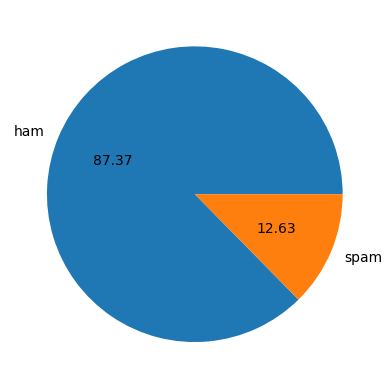

In [16]:
plt.pie(df['output'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
df['num_char'] = df['sms'].apply(len)
df.head()

,output,sms,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# number of words
# df['text']=df['text'].apply(str)
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))


In [19]:
df.head()

,output,sms,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [21]:
df.head()

,output,sms,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df.describe()

,output,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
# ham
df[df['output']==0][['num_char','num_words','num_sentences']].describe()
# mean characters for ham msg is only 70.5

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# spam
df[df['output']==1][['num_char','num_words','num_sentences']].describe()
# mean characters for spam msg is only 138

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


[]

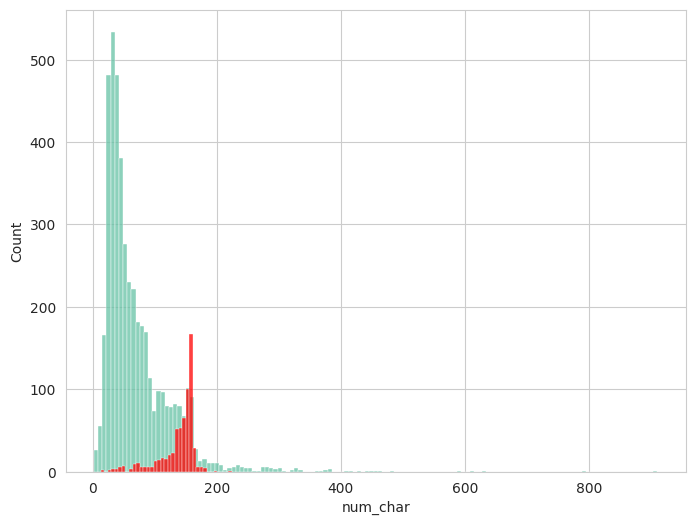

In [93]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['output'] == 0]['num_char'])
sns.histplot(df[df['output'] == 1]['num_char'],color='red')
plt.plot()
# no of char is higher for spam msg

[]

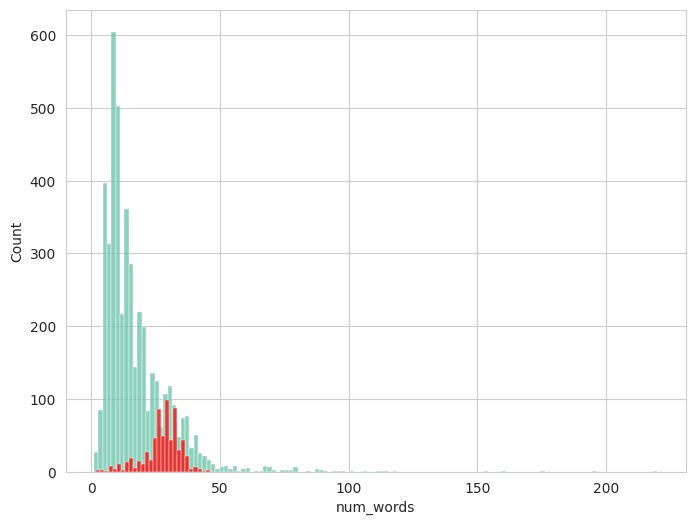

In [92]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['output'] == 0]['num_words'])
sns.histplot(df[df['output'] == 1]['num_words'],color='red')
plt.plot()

In [27]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,output,num_char,num_words,num_sentences
output,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-28-8aae07cea207>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


[]

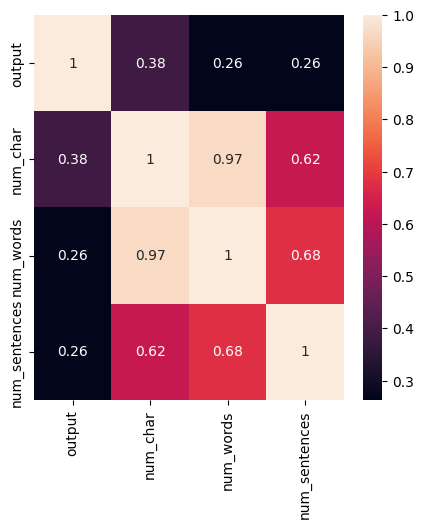

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)
plt.plot()

[]

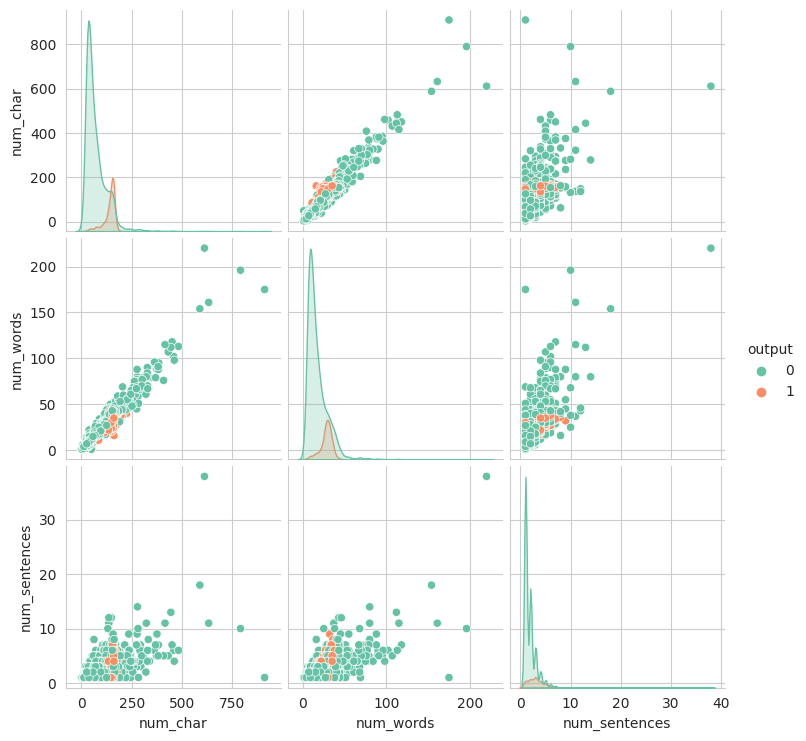

In [29]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.pairplot(df, hue='output')
plt.plot()

In [30]:
from nltk.stem.snowball import stopwords
# data/text peprocessing

def transform_sms(sms):
  sms=sms.lower()
  sms=nltk.word_tokenize(sms)
  y=[]
  for i in sms:
    if i.isalnum():
      y.append(i)

  # sms = y (error since y is a list)
  sms=y[:]
  y.clear()

  for i in sms:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i) 

  sms=y[:]
  y.clear()

  for i in sms:
    y.append(ps.stem(i))

  
  return " ".join(y)


In [ ]:
# from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english') 

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [34]:
df['transformed_sms']=df['sms'].apply(transform_sms)

In [35]:
df.head()

,output,sms,num_char,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [94]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [95]:
# spam
spam_wc = wc.generate(df[df['output']==1]['transformed_sms'].str.cat(sep=" "))

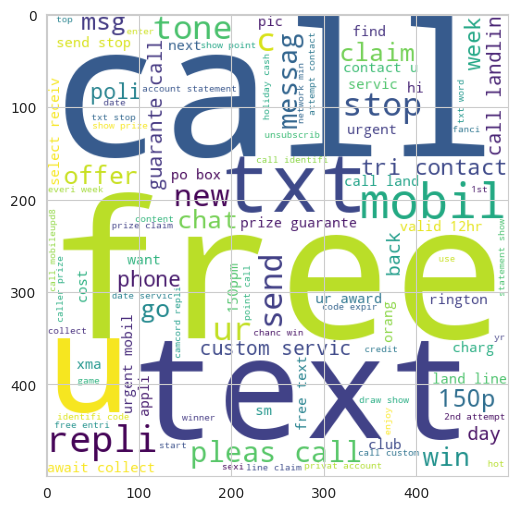

In [96]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [97]:
# spam
ham_wc = wc.generate(df[df['output']==0]['transformed_sms'].str.cat(sep=" "))

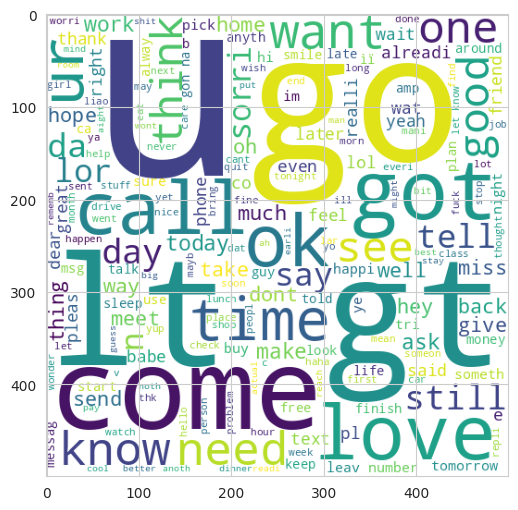

In [98]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [41]:
# to  print top-30 words
spam_corpus=[]
for msg in df[df['output']==1]['transformed_sms'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

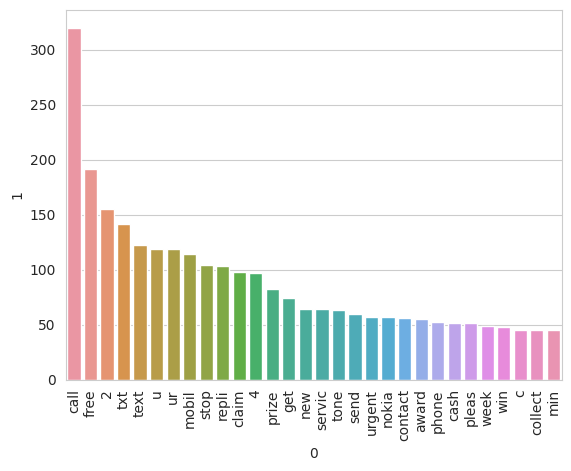

In [43]:
from collections import Counter
spam_counter = Counter(spam_corpus)
top_30_words = spam_counter.most_common(30)
df_top_30 = pd.DataFrame(top_30_words)

sns.barplot(x=df_top_30[0], y=df_top_30[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus=[]
for msg in df[df['output']==0]['transformed_sms'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

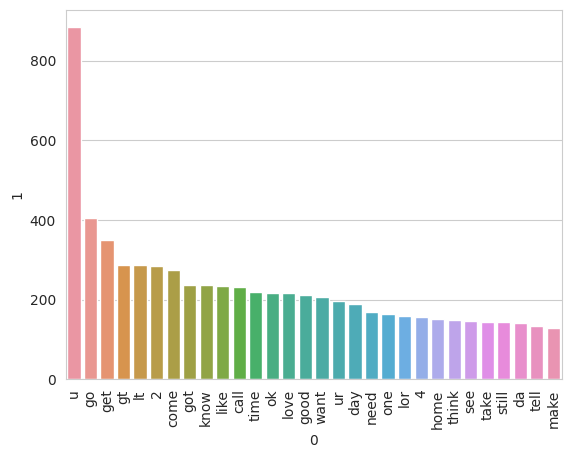

In [46]:
ham_counter = Counter(ham_corpus)
top_30_words = ham_counter.most_common(30)
df_top_30 = pd.DataFrame(top_30_words)

sns.barplot(x=df_top_30[0], y=df_top_30[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING
NAIVE BAYES MODEL IS BEST SUITED FOR TEXTUAL DATA
(MODEL REQUIRES NUMERICAL INPUT THEREFORE TEXT TO VECTOR)

In [79]:
# BAG OF WORDS 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
#  sparse matrix is then converted to a dense array 
# using Tfidf
X= tfidf.fit_transform(df['transformed_sms']).toarray()
X.shape

(5169, 3000)

In [81]:
y = df['output'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [84]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [85]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [86]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [87]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# When dealing with unbalanced output or when the cost of false positives is high, precision becomes more important than accuracy.
# therefore selecting tfidf along with multinomial

In [88]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))